In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

car_train = pd.read_csv("car_train.csv")
car_train

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,9492.96,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2656.23,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,1526.11,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1338.00,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,825.72,engine_fuel
...,...,...,...,...,...,...,...,...,...,...
2332,j21246192N,Smart ForFour,economy,petrol,4.38,2017,121239,2018,547.30,wheel_shake
2333,h-1554287F,Audi A4,premium,petrol,4.30,2016,107793,2020,26414.19,engine_check
2334,A15262612g,Kia Rio,economy,petrol,3.88,2015,80234,2019,2677.95,gear_stick
2335,W-2514493U,Renault Sandero,standart,petrol,4.50,2014,60048,2020,2213.63,another_bug


Визуализируем данные

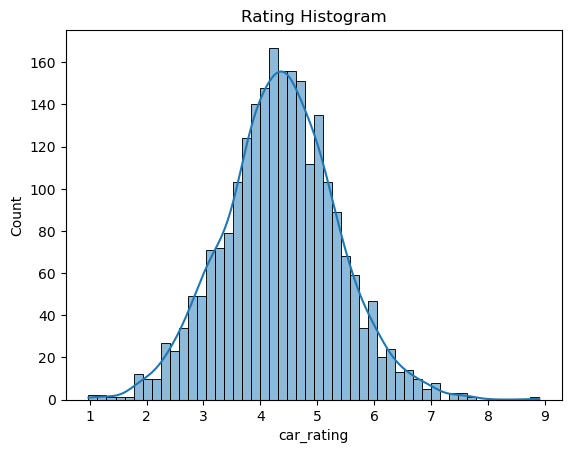

In [3]:
rating = sns.histplot(data=car_train, x="car_rating", bins=50, kde=True)
rating.set_title('Rating Histogram')

plt.show()

Тут видно что распределения рейтинг машин соответствует нормальному

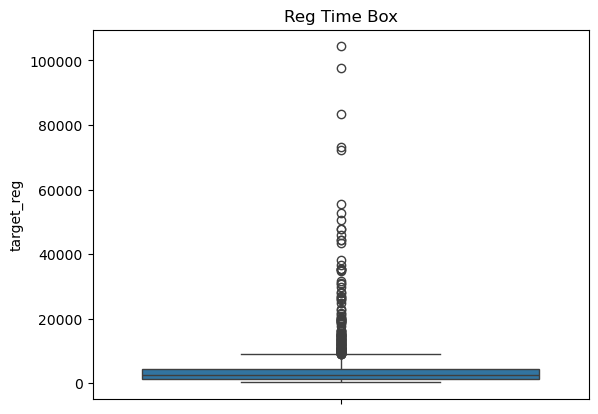

In [4]:
boxreg = sns.boxplot(data=car_train, y='target_reg')
boxreg.set_title('Reg Time Box')

plt.show()

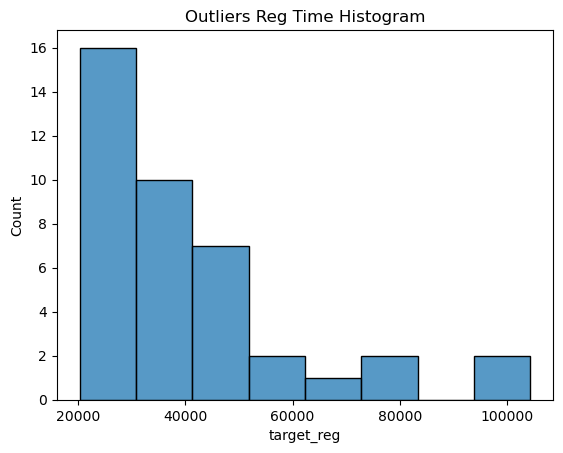

In [5]:
reg_outliers = car_train[car_train['target_reg'] > 20000]
reg = sns.histplot(data=reg_outliers, x="target_reg")
reg.set_title('Outliers Reg Time Histogram')

plt.show()

Вероятно, судя по гистограмме, вероятность поломки зависит от класса автомобиля

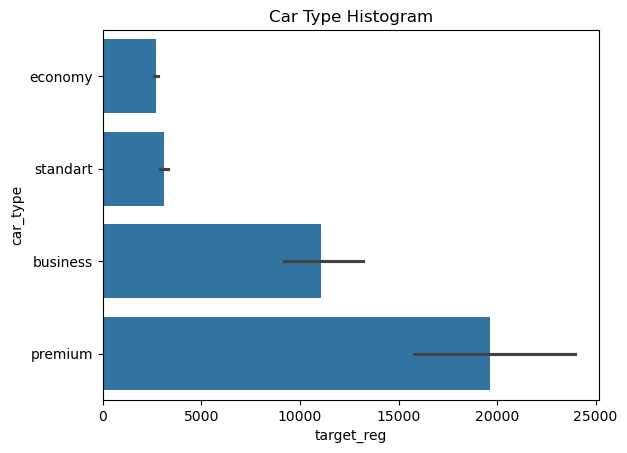

In [7]:
car_type = sns.barplot(data=car_train,
                   y='car_type',
                   x='target_reg',
                   estimator=np.mean)
car_type.set_title('Car Type Histogram')

plt.show()

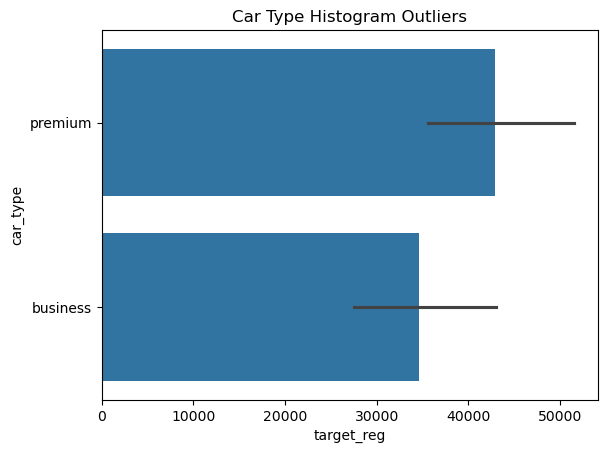

In [9]:
car_outliers = sns.barplot(data=reg_outliers,
                   y='car_type',
                   x='target_reg',
                   estimator=np.mean)

car_outliers.set_title('Car Type Histogram Outliers')

plt.show()

Что и требовалось доказать. Время поломки премиум и бизнес машин сильно больше чем у других классов.

Следует создать отдельную выборку для бизнес и премиум классов.

In [10]:
premium_class = car_train[(car_train['car_type'] == 'business') | (car_train['car_type'] == 'premium')]
ordinary_class = car_train[(car_train['car_type'] == 'economy') | (car_train['car_type'] == 'standart')]

Разобравшись с классами авто, рассмотрим зависимость типа двигателя от времени поломки

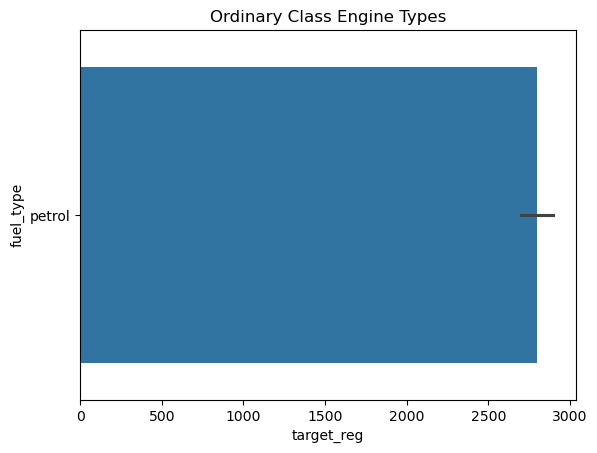

In [11]:
ordinary_cars = sns.barplot(data=ordinary_class,
                   x='target_reg',
                   y='fuel_type',
                   estimator=np.mean)
ordinary_cars.set_title('Ordinary Class Engine Types')

plt.show()

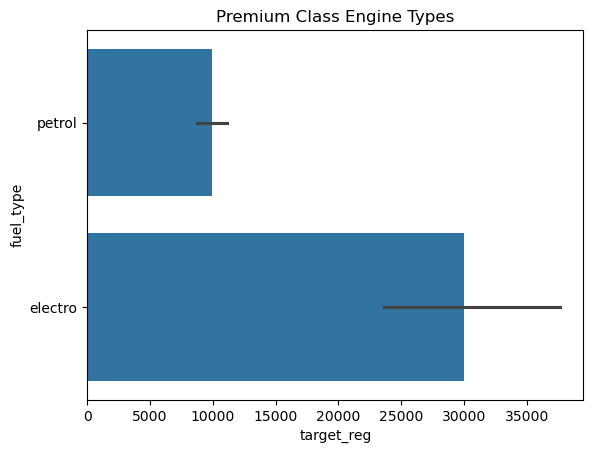

In [12]:
ordinary_cars = sns.barplot(data=premium_class,
                   x='target_reg',
                   y='fuel_type',
                   estimator=np.mean)
ordinary_cars.set_title('Premium Class Engine Types')

plt.show()

Зная всё это сделаем распределение времени поломок применяя разделение авто на классы

Для обычных:

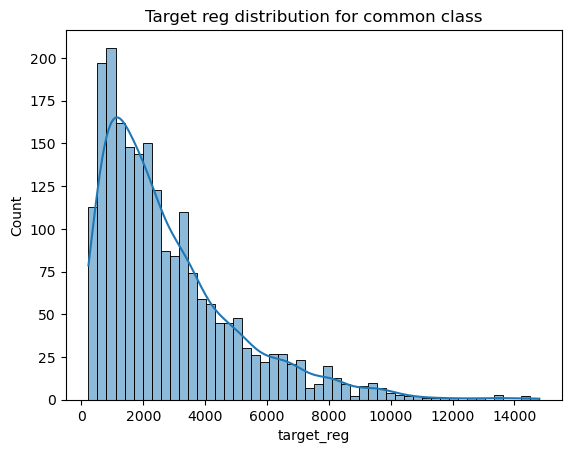

In [17]:
ordinary_reg = sns.histplot(data=ordinary_class,
                  x='target_reg',
                  kde=True,
                  bins=50)
ordinary_reg.set_title('Target reg distribution for common class')

plt.show()

И для премиум класса:

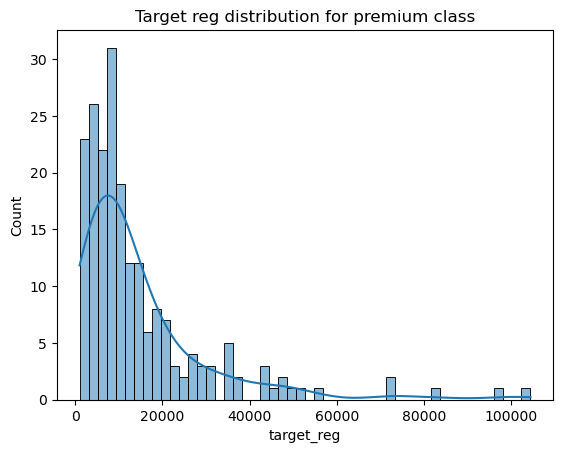

In [16]:
premium_reg = sns.histplot(data=premium_class,
                  x='target_reg',
                  kde=True,
                  bins=50)
premium_reg.set_title('Target reg distribution for premium class')

plt.show()